## Uncertainties in CO2 Calibration Reference Materials 
----
Created August 2024 

----
In this first model experiment, systematic biases ranging from 0.01 ppm to 2.0 ppm are randomly imposed on pseudo mole fraction observations at two sites (Cabauw, Netherlands and Mace Head, Ireland) to determine the impact on derived top-down emissions estimates. Here, the results from this first model experiment are analysed. 


49 experiments were run each with 100 inversions. They are all combinations of: systematic biases of [0.01, 0.025, 0.05, 0.075, 0.10, 0.15, 0.20] ppm with Gaussian noise with mean of 0 ppm and stadard deviations of [0, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0] ppm. 


Questions we seek to answer include:

1. Can the biases be detected in the mole fractions (between prior and posterior) and at what SNR?
2. What is the impact of mole fraction biases on UK emissions totals?
3. What is the optimum SNR between bias and random noise that allows for detection of biases in the UK emissions estimates?
4. 


In [13]:
import os
import numpy as np
import xarray as xr
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from scipy.stats import linregress, ttest_rel, ttest_ind

In [2]:
npl_output_dir = "/user/work/wz22079/projects/CO2/NPL-calibration/results/"

# Data loading (no noise)
ds_b001_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.01pmm-uncert_0.0-r100.nc"))
ds_b025_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.025pmm-uncert_0.0-r100.nc"))
ds_b050_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.05pmm-uncert_0.0-r100.nc"))
ds_b075_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.075pmm-uncert_0.0-r100.nc"))
ds_b010_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.1pmm-uncert_0.0-r100.nc"))
ds_b015_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.15pmm-uncert_0.0-r100.nc"))
ds_b020_n0 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.2pmm-uncert_0.0-r100.nc"))


# Data loading (0.05 ppm noise)
ds_b001_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.01pmm-uncert_0.05-r100.nc"))
ds_b025_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.025pmm-uncert_0.05-r100.nc"))
ds_b050_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.05pmm-uncert_0.05-r100.nc"))
ds_b075_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.075pmm-uncert_0.05-r100.nc"))
ds_b010_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.1pmm-uncert_0.05-r100.nc"))
ds_b015_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.15pmm-uncert_0.05-r100.nc"))
ds_b020_n005 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.2pmm-uncert_0.05-r100.nc"))

# Data loading (0.10 ppm noise)
ds_b001_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.01pmm-uncert_0.1-r100.nc"))
ds_b025_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.025pmm-uncert_0.1-r100.nc"))
ds_b050_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.05pmm-uncert_0.1-r100.nc"))
ds_b075_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.075pmm-uncert_0.1-r100.nc"))
ds_b010_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.1pmm-uncert_0.1-r100.nc"))
ds_b015_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.15pmm-uncert_0.1-r100.nc"))
ds_b020_n01 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.2pmm-uncert_0.1-r100.nc"))

# Data loading (0.25 ppm noise)
ds_b001_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.01pmm-uncert_0.25-r100.nc"))
ds_b025_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.025pmm-uncert_0.25-r100.nc"))
ds_b050_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.05pmm-uncert_0.25-r100.nc"))
ds_b075_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.075pmm-uncert_0.25-r100.nc"))
ds_b010_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.1pmm-uncert_0.25-r100.nc"))
ds_b015_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.15pmm-uncert_0.25-r100.nc"))
ds_b020_n025 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.2pmm-uncert_0.25-r100.nc"))

# Data loading (0.50 ppm noise)
ds_b001_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.01pmm-uncert_0.5-r100.nc"))
ds_b025_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.025pmm-uncert_0.5-r100.nc"))
ds_b050_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.05pmm-uncert_0.5-r100.nc"))
ds_b075_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.075pmm-uncert_0.5-r100.nc"))
ds_b010_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.1pmm-uncert_0.5-r100.nc"))
ds_b015_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.15pmm-uncert_0.5-r100.nc"))
ds_b020_n05 = xr.open_dataset(os.path.join(npl_output_dir, "NPL-inversions-CO2-CBW_MHD-bias_0.2pmm-uncert_0.5-r100.nc"))


In [3]:
# UK Emissions differences when no noise applied 
delta_b001_n0 = ds_b001_n0["UK_posterior_emissions"].values-ds_b001_n0["UK_prior_emissions"].values
delta_b025_n0 = ds_b025_n0["UK_posterior_emissions"].values-ds_b025_n0["UK_prior_emissions"].values
delta_b050_n0 = ds_b050_n0["UK_posterior_emissions"].values-ds_b050_n0["UK_prior_emissions"].values
delta_b075_n0 = ds_b075_n0["UK_posterior_emissions"].values-ds_b075_n0["UK_prior_emissions"].values
delta_b010_n0 = ds_b010_n0["UK_posterior_emissions"].values-ds_b010_n0["UK_prior_emissions"].values
delta_b015_n0 = ds_b015_n0["UK_posterior_emissions"].values-ds_b015_n0["UK_prior_emissions"].values
delta_b020_n0 = ds_b020_n0["UK_posterior_emissions"].values-ds_b020_n0["UK_prior_emissions"].values

delta_b001_n005 = ds_b001_n005["UK_posterior_emissions"].values-ds_b001_n005["UK_prior_emissions"].values
delta_b025_n005 = ds_b025_n005["UK_posterior_emissions"].values-ds_b025_n005["UK_prior_emissions"].values
delta_b050_n005 = ds_b050_n005["UK_posterior_emissions"].values-ds_b050_n005["UK_prior_emissions"].values
delta_b075_n005 = ds_b075_n005["UK_posterior_emissions"].values-ds_b075_n005["UK_prior_emissions"].values
delta_b010_n005 = ds_b010_n005["UK_posterior_emissions"].values-ds_b010_n005["UK_prior_emissions"].values
delta_b015_n005 = ds_b015_n005["UK_posterior_emissions"].values-ds_b015_n005["UK_prior_emissions"].values
delta_b020_n005 = ds_b020_n005["UK_posterior_emissions"].values-ds_b020_n005["UK_prior_emissions"].values

delta_b001_n01 = ds_b001_n01["UK_posterior_emissions"].values-ds_b001_n01["UK_prior_emissions"].values
delta_b025_n01 = ds_b025_n01["UK_posterior_emissions"].values-ds_b025_n01["UK_prior_emissions"].values
delta_b050_n01 = ds_b050_n01["UK_posterior_emissions"].values-ds_b050_n01["UK_prior_emissions"].values
delta_b075_n01 = ds_b075_n01["UK_posterior_emissions"].values-ds_b075_n01["UK_prior_emissions"].values
delta_b010_n01 = ds_b010_n01["UK_posterior_emissions"].values-ds_b010_n01["UK_prior_emissions"].values
delta_b015_n01 = ds_b015_n01["UK_posterior_emissions"].values-ds_b015_n01["UK_prior_emissions"].values
delta_b020_n01 = ds_b020_n01["UK_posterior_emissions"].values-ds_b020_n01["UK_prior_emissions"].values

delta_b001_n025 = ds_b001_n025["UK_posterior_emissions"].values-ds_b001_n025["UK_prior_emissions"].values
delta_b025_n025 = ds_b025_n025["UK_posterior_emissions"].values-ds_b025_n025["UK_prior_emissions"].values
delta_b050_n025 = ds_b050_n025["UK_posterior_emissions"].values-ds_b050_n025["UK_prior_emissions"].values
delta_b075_n025 = ds_b075_n025["UK_posterior_emissions"].values-ds_b075_n025["UK_prior_emissions"].values
delta_b010_n025 = ds_b010_n025["UK_posterior_emissions"].values-ds_b010_n025["UK_prior_emissions"].values
delta_b015_n025 = ds_b015_n025["UK_posterior_emissions"].values-ds_b015_n025["UK_prior_emissions"].values
delta_b020_n025 = ds_b020_n025["UK_posterior_emissions"].values-ds_b020_n025["UK_prior_emissions"].values

delta_b001_n05 = ds_b001_n05["UK_posterior_emissions"].values-ds_b001_n05["UK_prior_emissions"].values
delta_b025_n05 = ds_b025_n05["UK_posterior_emissions"].values-ds_b025_n05["UK_prior_emissions"].values
delta_b050_n05 = ds_b050_n05["UK_posterior_emissions"].values-ds_b050_n05["UK_prior_emissions"].values
delta_b075_n05 = ds_b075_n05["UK_posterior_emissions"].values-ds_b075_n05["UK_prior_emissions"].values
delta_b010_n05 = ds_b010_n05["UK_posterior_emissions"].values-ds_b010_n05["UK_prior_emissions"].values
delta_b015_n05 = ds_b015_n05["UK_posterior_emissions"].values-ds_b015_n05["UK_prior_emissions"].values
delta_b020_n05 = ds_b020_n05["UK_posterior_emissions"].values-ds_b020_n05["UK_prior_emissions"].values


## Plotting Results 
### Without Gaussian Noise Being Applied

slope 5.740614851550925
y-intercept -1.0371462353386818e-06


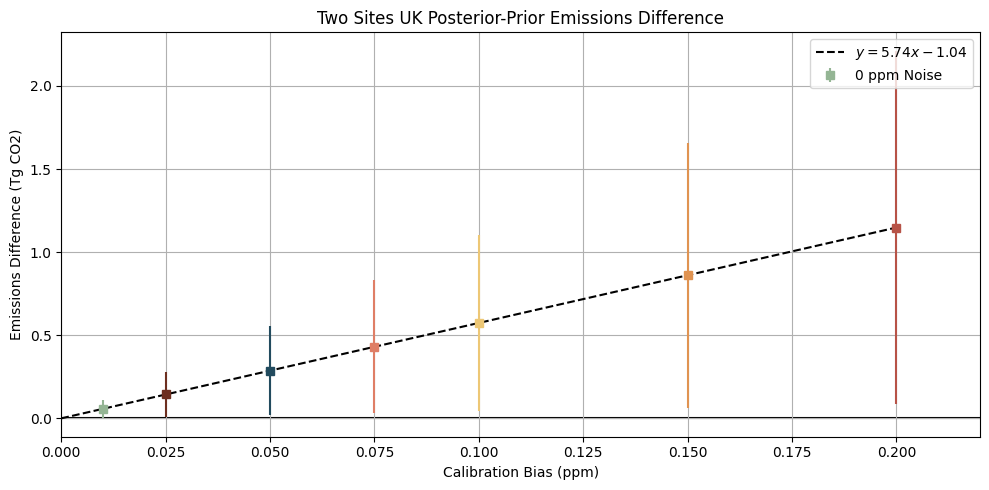

In [4]:
x = np.array([0.01, 0.025, 0.05, 0.075, 0.10, 0.15, 0.20])
y0 = [np.mean(delta_b001_n0),
      np.mean(delta_b025_n0),
      np.mean(delta_b050_n0),
      np.mean(delta_b075_n0),
      np.mean(delta_b010_n0),
      np.mean(delta_b015_n0),
      np.mean(delta_b020_n0),
     ]

out = linregress(x, y0)

x_int = np.linspace(0.0, 0.20, 200)
y_fit = x_int * out[0] + out[1]
print("slope", out[0])
print("y-intercept", out[1])

######################################################################

fig, ax = plt.subplots(figsize=(10,5))
shift0 = -0.000
ax.errorbar(0.01+shift0, np.mean(delta_b001_n0), yerr=np.std(delta_b001_n0), fmt="s", mec="#94b594", mfc="#94b594", ecolor="#94b594", ms=6, label="0 ppm Noise")
ax.errorbar(0.025+shift0, np.mean(delta_b025_n0), yerr=np.std(delta_b025_n0), fmt="s", mec="#6d2f20", mfc="#6d2f20", ecolor="#6d2f20", ms=6)
ax.errorbar(0.050+shift0, np.mean(delta_b050_n0), yerr=np.std(delta_b050_n0), fmt="s", mec="#224b5e", mfc="#224b5e", ecolor="#224b5e", ms=6)
ax.errorbar(0.075+shift0, np.mean(delta_b075_n0), yerr=np.std(delta_b075_n0), fmt="s", mec="#df7e66", mfc="#df7e66", ecolor="#df7e66", ms=6)
ax.errorbar(0.10+shift0, np.mean(delta_b010_n0), yerr=np.std(delta_b010_n0), fmt="s", mec="#edc775", mfc="#edc775", ecolor="#edc775", ms=6)
ax.errorbar(0.15+shift0, np.mean(delta_b015_n0), yerr=np.std(delta_b015_n0), fmt="s", mec="#e09351", mfc="#e09351", ecolor="#e09351", ms=6)
ax.errorbar(0.20+shift0, np.mean(delta_b020_n0), yerr=np.std(delta_b020_n0), fmt="s", mec="#b75347", mfc="#b75347", ecolor="#b75347", ms=6)


ax.plot(x_int, y_fit, 'k--', label = r"$y=5.74x-1.04$")

ax.legend()
ax.set_xlim((0.0, 0.22))
# ax.axhline(0.0, color="k", alpha=0.5)
# ax.axvline(0.1, color="k", alpha=0.5, zorder=0)
ax.set_xlabel("Calibration Bias (ppm)")
ax.set_ylabel("Emissions Difference (Tg CO2)")
ax.set_title("Two Sites UK Posterior-Prior Emissions Difference")
ax.grid()
ax.axhline(0.0, color="k", zorder=0)
fig.tight_layout()
# plt.show()
plt.savefig("/user/work/wz22079/projects/CO2/NPL-calibration/figures/NPL-inversions-CO2-CBW_MHD-nonoise_mean.jpg", dpi=300)

**Figure 1**: Posterior-prior UK CO2 emissions difference for different calibration loadings. Markers denote the mean values and error bars 1-sigma standard deviations.

----
*Effect of calibration uncertainty is to increase the UK emissions uncertainty by 5.7 Tg CO2 for every 1 ppm of calibration bias applied to the pseudo-observations (on average). Standard deviations also grow in size too*

*Next step is to check whether this trend is statistically significant by calculating a weighted linear regression for these data*

In [7]:
y0mu = np.array([np.mean(delta_b001_n0),
        np.mean(delta_b025_n0),
        np.mean(delta_b050_n0),
        np.mean(delta_b075_n0),
        np.mean(delta_b010_n0),
        np.mean(delta_b015_n0),
        np.mean(delta_b020_n0),
                ])

y0sd = np.array([np.std(delta_b001_n0),
        np.std(delta_b025_n0),
        np.std(delta_b050_n0),
        np.std(delta_b075_n0),
        np.std(delta_b010_n0),
        np.std(delta_b015_n0),
        np.std(delta_b020_n0),
                ])

X = sm.add_constant(x)
model = sm.WLS(y0mu, X, weights=y0sd)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.701e+26
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           5.03e-65
Time:                        15:07:50   Log-Likelihood:                 202.16
No. Observations:                   7   AIC:                            -400.3
Df Residuals:                       5   BIC:                            -400.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.037e-06   6.41e-14  -1.62e+07      0.0

/user/home/wz22079/.conda/envs/openghg_zarr_env/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


From the WLS regression it seems that the trend is statistically significant! Now, let's look at the trend in the standard deviations

regression slope 5.318619352404376
regression y-intercept -1.0946799022804043e-13


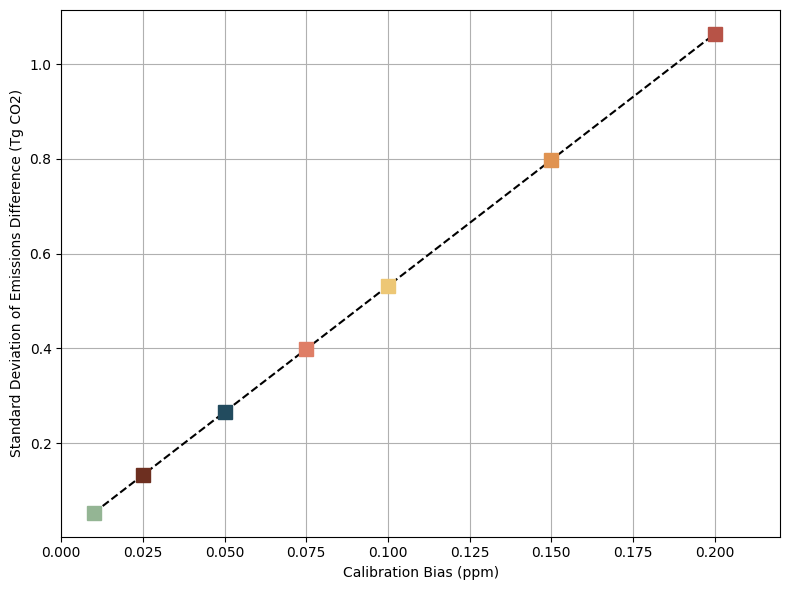

In [9]:
# Plotting the change in standard deviations for "no-noise" posterior-prior emissions differences
out0 = linregress(x, y0sd)
print("regression slope", out0[0])
print("regression y-intercept", out0[1])

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y0sd, '--', color="k", label=r"$y=5.31x-1.09$")
ax.plot(x[0], y0sd[0], 's', color="#94b594", alpha=1.0, ms=10)
ax.plot(x[1], y0sd[1], 's', color="#6d2f20", alpha=1.0, ms=10)
ax.plot(x[2], y0sd[2], 's', color="#224b5e", alpha=1.0, ms=10)
ax.plot(x[3], y0sd[3], 's', color="#df7e66", alpha=1.0, ms=10)
ax.plot(x[4], y0sd[4], 's', color="#edc775", alpha=1.0, ms=10)
ax.plot(x[5], y0sd[5], 's', color="#e09351", alpha=1.0, ms=10)
ax.plot(x[6], y0sd[6], 's', color="#b75347", alpha=1.0, ms=10)


ax.set_ylabel("Standard Deviation of Emissions Difference (Tg CO2)")
ax.set_xlabel("Calibration Bias (ppm)")
ax.set_xlim((0.0, 0.22))
ax.grid()

fig.tight_layout()
# plt.show()
plt.savefig("/user/work/wz22079/projects/CO2/NPL-calibration/figures/NPL-inversions-CO2-CBW_MHD-change_in_stdev.jpg", dpi=300)

**Figure 2:** Change in posterio-prior UK emissions standard deviation (1-sigma) value for each calibration bias. 

----
*From the linear regression, we find that the 1-sigma standard deviation increases by about 5.31 Tg CO2 per 1 ppm of calibration bias. This could potentially be due to the larger probability space created in the inversions as the larger biases applied mean there's more possibilities of where the emissions can exist. NB. this trend is statistically significant*

### With Gaussian Noise Applied

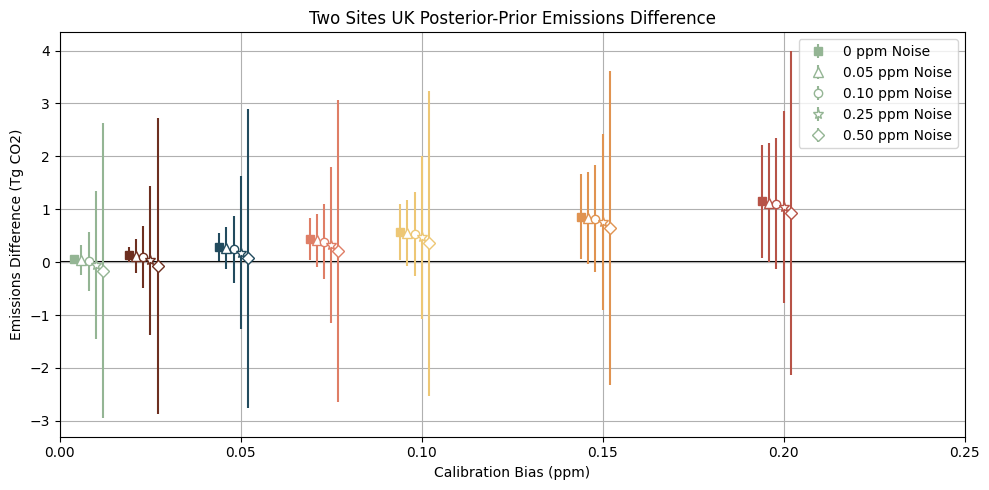

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
shift0 = -0.0060
ax.errorbar(0.01+shift0, np.mean(delta_b001_n0), yerr=np.std(delta_b001_n0), fmt="s", mec="#94b594", mfc="#94b594", ecolor="#94b594", ms=6, label="0 ppm Noise")
ax.errorbar(0.025+shift0, np.mean(delta_b025_n0), yerr=np.std(delta_b025_n0), fmt="s", mec="#6d2f20", mfc="#6d2f20", ecolor="#6d2f20", ms=6)
ax.errorbar(0.050+shift0, np.mean(delta_b050_n0), yerr=np.std(delta_b050_n0), fmt="s", mec="#224b5e", mfc="#224b5e", ecolor="#224b5e", ms=6)
ax.errorbar(0.075+shift0, np.mean(delta_b075_n0), yerr=np.std(delta_b075_n0), fmt="s", mec="#df7e66", mfc="#df7e66", ecolor="#df7e66", ms=6)
ax.errorbar(0.10+shift0, np.mean(delta_b010_n0), yerr=np.std(delta_b010_n0), fmt="s", mec="#edc775", mfc="#edc775", ecolor="#edc775", ms=6)
ax.errorbar(0.15+shift0, np.mean(delta_b015_n0), yerr=np.std(delta_b015_n0), fmt="s", mec="#e09351", mfc="#e09351", ecolor="#e09351", ms=6)
ax.errorbar(0.20+shift0, np.mean(delta_b020_n0), yerr=np.std(delta_b020_n0), fmt="s", mec="#b75347", mfc="#b75347", ecolor="#b75347", ms=6)

shift1 = -0.0040
ax.errorbar(0.01+shift1, np.mean(delta_b001_n005), yerr=np.std(delta_b001_n005), fmt="^", mec="#94b594", mfc="white", ecolor="#94b594", ms=7, label="0.05 ppm Noise")
ax.errorbar(0.025+shift1, np.mean(delta_b025_n005), yerr=np.std(delta_b025_n005), fmt="^", mec="#6d2f20", mfc="white", ecolor="#6d2f20", ms=7)
ax.errorbar(0.050+shift1, np.mean(delta_b050_n005), yerr=np.std(delta_b050_n005), fmt="^", mec="#224b5e", mfc="white", ecolor="#224b5e", ms=7)
ax.errorbar(0.075+shift1, np.mean(delta_b075_n005), yerr=np.std(delta_b075_n005), fmt="^", mec="#df7e66", mfc="white", ecolor="#df7e66", ms=7)
ax.errorbar(0.10+shift1, np.mean(delta_b010_n005), yerr=np.std(delta_b010_n005), fmt="^", mec="#edc775", mfc="white", ecolor="#edc775", ms=7)
ax.errorbar(0.15+shift1, np.mean(delta_b015_n005), yerr=np.std(delta_b015_n005), fmt="^", mec="#e09351", mfc="white", ecolor="#e09351", ms=7)
ax.errorbar(0.20+shift1, np.mean(delta_b020_n005), yerr=np.std(delta_b020_n005), fmt="^", mec="#b75347", mfc="white", ecolor="#b75347", ms=7)

shift2 = -0.0020
ax.errorbar(0.01+shift2, np.mean(delta_b001_n01), yerr=np.std(delta_b001_n01), fmt="o", mec="#94b594", mfc="white", ecolor="#94b594", ms=6, label="0.10 ppm Noise")
ax.errorbar(0.025+shift2, np.mean(delta_b025_n01), yerr=np.std(delta_b025_n01), fmt="o", mec="#6d2f20", mfc="white", ecolor="#6d2f20", ms=6)
ax.errorbar(0.050+shift2, np.mean(delta_b050_n01), yerr=np.std(delta_b050_n01), fmt="o", mec="#224b5e", mfc="white", ecolor="#224b5e", ms=6)
ax.errorbar(0.075+shift2, np.mean(delta_b075_n01), yerr=np.std(delta_b075_n01), fmt="o", mec="#df7e66", mfc="white", ecolor="#df7e66", ms=6)
ax.errorbar(0.10+shift2, np.mean(delta_b010_n01), yerr=np.std(delta_b010_n01), fmt="o", mec="#edc775", mfc="white", ecolor="#edc775", ms=6)
ax.errorbar(0.15+shift2, np.mean(delta_b015_n01), yerr=np.std(delta_b015_n01), fmt="o", mec="#e09351", mfc="white", ecolor="#e09351", ms=6)
ax.errorbar(0.20+shift2, np.mean(delta_b020_n01), yerr=np.std(delta_b020_n01), fmt="o", mec="#b75347", mfc="white", ecolor="#b75347", ms=6)


shift3 = -0.000
ax.errorbar(0.01+shift3, np.mean(delta_b001_n025), yerr=np.std(delta_b001_n025), fmt="*", mec="#94b594", mfc="white", ecolor="#94b594", ms=7, label="0.25 ppm Noise")
ax.errorbar(0.025+shift3, np.mean(delta_b025_n025), yerr=np.std(delta_b025_n025), fmt="*", mec="#6d2f20", mfc="white", ecolor="#6d2f20", ms=7)
ax.errorbar(0.050+shift3, np.mean(delta_b050_n025), yerr=np.std(delta_b050_n025), fmt="*", mec="#224b5e", mfc="white", ecolor="#224b5e", ms=7)
ax.errorbar(0.075+shift3, np.mean(delta_b075_n025), yerr=np.std(delta_b075_n025), fmt="*", mec="#df7e66", mfc="white", ecolor="#df7e66", ms=7)
ax.errorbar(0.10+shift3, np.mean(delta_b010_n025), yerr=np.std(delta_b010_n025), fmt="*", mec="#edc775", mfc="white", ecolor="#edc775", ms=7)
ax.errorbar(0.15+shift3, np.mean(delta_b015_n025), yerr=np.std(delta_b015_n025), fmt="*", mec="#e09351", mfc="white", ecolor="#e09351", ms=7)
ax.errorbar(0.20+shift3, np.mean(delta_b020_n025), yerr=np.std(delta_b020_n025), fmt="*", mec="#b75347", mfc="white", ecolor="#b75347", ms=7)

shift4 = +0.0020
ax.errorbar(0.01+shift4, np.mean(delta_b001_n05), yerr=np.std(delta_b001_n05), fmt="D", mec="#94b594", mfc="white", ecolor="#94b594", ms=6, label="0.50 ppm Noise")
ax.errorbar(0.025+shift4, np.mean(delta_b025_n05), yerr=np.std(delta_b025_n05), fmt="D", mec="#6d2f20", mfc="white", ecolor="#6d2f20", ms=6)
ax.errorbar(0.050+shift4, np.mean(delta_b050_n05), yerr=np.std(delta_b050_n05), fmt="D", mec="#224b5e", mfc="white", ecolor="#224b5e", ms=6)
ax.errorbar(0.075+shift4, np.mean(delta_b075_n05), yerr=np.std(delta_b075_n05), fmt="D", mec="#df7e66", mfc="white", ecolor="#df7e66", ms=6)
ax.errorbar(0.10+shift4, np.mean(delta_b010_n05), yerr=np.std(delta_b010_n05), fmt="D", mec="#edc775", mfc="white", ecolor="#edc775", ms=6)
ax.errorbar(0.15+shift4, np.mean(delta_b015_n05), yerr=np.std(delta_b015_n05), fmt="D", mec="#e09351", mfc="white", ecolor="#e09351", ms=6)
ax.errorbar(0.20+shift4, np.mean(delta_b020_n05), yerr=np.std(delta_b020_n05), fmt="D", mec="#b75347", mfc="white", ecolor="#b75347", ms=6)


ax.legend()
ax.set_xlim((0.0, 0.25))
# ax.axhline(0.0, color="k", alpha=0.5)
# ax.axvline(0.1, color="k", alpha=0.5, zorder=0)
ax.set_xlabel("Calibration Bias (ppm)")
ax.set_ylabel("Emissions Difference (Tg CO2)")
ax.set_title("Two Sites UK Posterior-Prior Emissions Difference")
ax.grid()
ax.axhline(0.0, color="k", zorder=0)
fig.tight_layout()
# plt.show()
plt.savefig("/user/work/wz22079/projects/CO2/NPL-calibration/figures/NPL-inversions-CO2-CBW_MHD-noise_mean.jpg", dpi=300)


**Figure 3**: Posterior-prior UK CO2 emissions differences for bias loadings with and without Gaussian noise applied. Markers denote mean values, and error bars the 1-sigma standard deviations

----

First, we explore the change in mean posterior-prior emissions difference when noise is added for each loading. 

In [26]:
# Deviations from no noise 
noise_levels = [0.05, 0.10, 0.25, 0.50]
deviation_from_no_noise_b001 = [np.mean(delta_b001_n005)-np.mean(delta_b001_n0),
                                np.mean(delta_b001_n01)-np.mean(delta_b001_n0),
                                np.mean(delta_b001_n025)-np.mean(delta_b001_n0),
                                np.mean(delta_b001_n05)-np.mean(delta_b001_n0)
                               ]

deviation_from_no_noise_b025 = [np.mean(delta_b025_n005)-np.mean(delta_b025_n0),
                                np.mean(delta_b025_n01)-np.mean(delta_b025_n0),
                                np.mean(delta_b025_n025)-np.mean(delta_b025_n0),
                                np.mean(delta_b025_n05)-np.mean(delta_b025_n0)
                               ]

deviation_from_no_noise_b050 = [np.mean(delta_b050_n005)-np.mean(delta_b050_n0),
                                np.mean(delta_b050_n01)-np.mean(delta_b050_n0),
                                np.mean(delta_b050_n025)-np.mean(delta_b050_n0),
                                np.mean(delta_b050_n05)-np.mean(delta_b050_n0)
                               ]

deviation_from_no_noise_b075 = [np.mean(delta_b075_n005)-np.mean(delta_b075_n0),
                                np.mean(delta_b075_n01)-np.mean(delta_b075_n0),
                                np.mean(delta_b075_n025)-np.mean(delta_b075_n0),
                                np.mean(delta_b075_n05)-np.mean(delta_b075_n0)
                               ]

deviation_from_no_noise_b010 = [np.mean(delta_b010_n005)-np.mean(delta_b010_n0),
                                np.mean(delta_b010_n01)-np.mean(delta_b010_n0),
                                np.mean(delta_b010_n025)-np.mean(delta_b010_n0),
                                np.mean(delta_b010_n05)-np.mean(delta_b010_n0)
                               ]

deviation_from_no_noise_b015 = [np.mean(delta_b015_n005)-np.mean(delta_b015_n0),
                                np.mean(delta_b015_n01)-np.mean(delta_b015_n0),
                                np.mean(delta_b015_n025)-np.mean(delta_b015_n0),
                                np.mean(delta_b015_n05)-np.mean(delta_b015_n0)
                               ]

deviation_from_no_noise_b020 = [np.mean(delta_b020_n005)-np.mean(delta_b020_n0),
                                np.mean(delta_b020_n01)-np.mean(delta_b020_n0),
                                np.mean(delta_b020_n025)-np.mean(delta_b020_n0),
                                np.mean(delta_b020_n05)-np.mean(delta_b020_n0)
                               ]

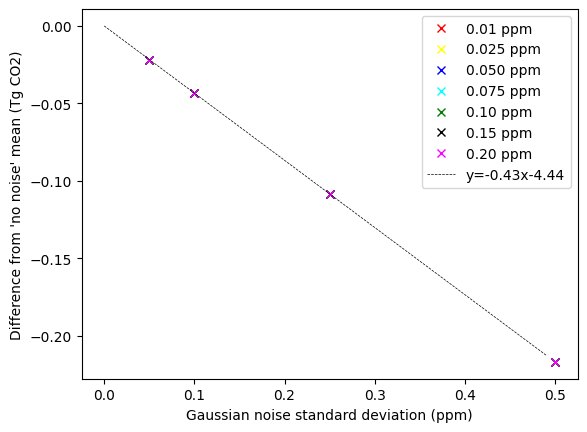

In [27]:
xxout = linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b001))

yy2 = xxout[0]*np.arange(0, 0.5, 0.01) + xxout[1]

fig, ax = plt.subplots()
ax.plot(noise_levels, deviation_from_no_noise_b001, 'x', color="red", label="0.01 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b025, 'x', color="yellow", label="0.025 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b050, 'x', color="blue", label="0.050 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b075, 'x', color="cyan", label="0.075 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b010, 'x', color="green", label="0.10 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b015, 'x', color="black", label="0.15 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b020, 'x', color="magenta", label="0.20 ppm")

ax.plot(np.arange(0, 0.5, 0.01), yy2, 'k--', label="y=-0.43x-4.44", lw=0.5)
ax.set_ylabel("Difference from 'no noise' mean (Tg CO2)")
ax.set_xlabel("Gaussian noise standard deviation (ppm)")
ax.legend()

plt.show()

**Figure 4**: Deviation of calibration bias mean values with noise from 'no noise' simulations. 

----
*Here, we see that adding Gaussian noise has the same effect for all calibration biases. These values show the deviation from the no noise scheme for each bias. A linear regression indicates that as the standard deviation of the Gaussian noise increases, the deviation from the 'no noise' scheme decreases by -0.43 Tg CO2 per ppm. This contrasts what we might expect given the SNR of the biases and noise levels.*

*Update: we should check whether this trend is statistically significant. i.e. t-test to compare the means of the two populations.*

**t-test statistic results**

- bias of 0.01 ppm -> t-values of 0.74-0.77, p>>0.05 -> Cannnot reject H0 therefore not statistically different
- bias of 0.025 ppm --> t-values of 0.62-0.77, p>>0.05 -> Cannnot reject H0 therefore not statistically different
- bias of 0.050 ppm --> t-values of 0.45-0.76, p>>0.05 -> Cannnot reject H0 therefore not statistically different
- bias of 0.075 ppm --> t-values of 0.33-0.75, p>>0.05 -> Cannnot reject H0 therefore not statistically different
- bias of 0.1 ppm --> t-values of 0.26-0.74, p>>0.05 -> Cannnot reject H0 therefore not statistically different
- bias of 0.15 ppm --> t-values of 0.18-0.70, p>>0.05 -> Cannnot reject H0 therefore not statistically different
- bias of 0.20 ppm --> t-values of 0.14-0.66, p>>0.05 -> Cannnot reject H0 therefore not statistically different

In summary, changes in the the mean values of the posterior-prior emissions difference when adding noise levels are not statistically significant. Very likely an artefact of the number of runs, and variability of the unperturbed simulated values. 

In [22]:
a = delta_b020_n0
b = delta_b020_n005
c = delta_b020_n01
d = delta_b020_n025
e = delta_b020_n05

print(ttest_ind(a, b, equal_var=False))
print(ttest_ind(a, c, equal_var=False))
print(ttest_ind(a, d, equal_var=False))
print(ttest_ind(a, e, equal_var=False))

# delta_b075_n005
# delta_b010_n005
# delta_b015_n005
# delta_b020_n005

TtestResult(statistic=0.13954861295621537, pvalue=0.889158883379851, df=197.44812735153837)
TtestResult(statistic=0.2639629576574861, pvalue=0.7920893974184855, df=193.4825420386461)
TtestResult(statistic=0.5112856181518179, pvalue=0.6098581926639919, df=159.48344080050882)
TtestResult(statistic=0.6649083392391826, pvalue=0.5073588431599765, df=122.51032068771987)


In [28]:
# Next up we calculate the change in standard deviations from the 'no noise' scheme.
# for each bias loading

deviation_from_no_noise_b001 = [np.std(delta_b001_n005)-np.std(delta_b001_n0),
                                np.std(delta_b001_n01)-np.std(delta_b001_n0),
                                np.std(delta_b001_n025)-np.std(delta_b001_n0),
                                np.std(delta_b001_n05)-np.std(delta_b001_n0)
                               ]

deviation_from_no_noise_b025 = [np.std(delta_b025_n005)-np.std(delta_b025_n0),
                                np.std(delta_b025_n01)-np.std(delta_b025_n0),
                                np.std(delta_b025_n025)-np.std(delta_b025_n0),
                                np.std(delta_b025_n05)-np.std(delta_b025_n0)
                               ]

deviation_from_no_noise_b050 = [np.std(delta_b050_n005)-np.std(delta_b050_n0),
                                np.std(delta_b050_n01)-np.std(delta_b050_n0),
                                np.std(delta_b050_n025)-np.std(delta_b050_n0),
                                np.std(delta_b050_n05)-np.std(delta_b050_n0)
                               ]

deviation_from_no_noise_b075 = [np.std(delta_b075_n005)-np.std(delta_b075_n0),
                                np.std(delta_b075_n01)-np.std(delta_b075_n0),
                                np.std(delta_b075_n025)-np.std(delta_b075_n0),
                                np.std(delta_b075_n05)-np.std(delta_b075_n0)
                               ]

deviation_from_no_noise_b010 = [np.std(delta_b010_n005)-np.std(delta_b010_n0),
                                np.std(delta_b010_n01)-np.std(delta_b010_n0),
                                np.std(delta_b010_n025)-np.std(delta_b010_n0),
                                np.std(delta_b010_n05)-np.std(delta_b010_n0)
                               ]

deviation_from_no_noise_b015 = [np.std(delta_b015_n005)-np.std(delta_b015_n0),
                                np.std(delta_b015_n01)-np.std(delta_b015_n0),
                                np.std(delta_b015_n025)-np.std(delta_b015_n0),
                                np.std(delta_b015_n05)-np.std(delta_b015_n0)
                               ]

deviation_from_no_noise_b020 = [np.std(delta_b020_n005)-np.std(delta_b020_n0),
                                np.std(delta_b020_n01)-np.std(delta_b020_n0),
                                np.std(delta_b020_n025)-np.std(delta_b020_n0),
                                np.std(delta_b020_n05)-np.std(delta_b020_n0)
                               ]

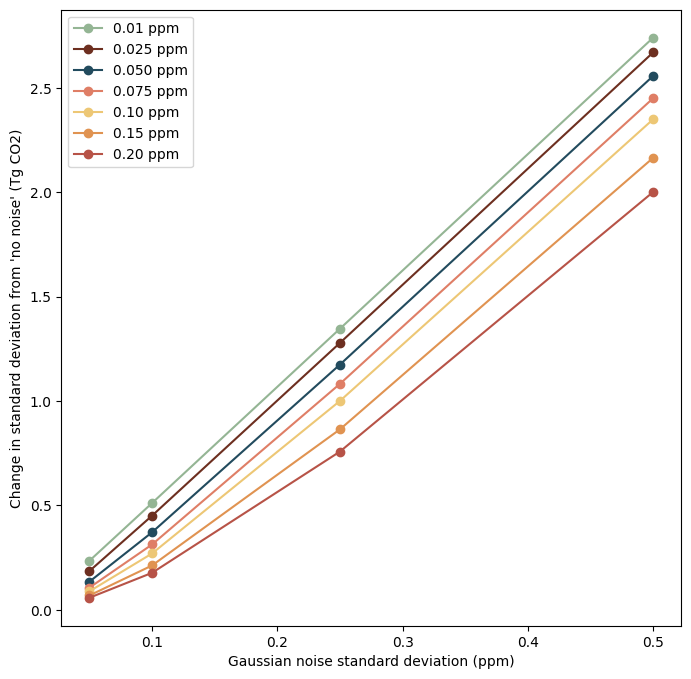

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(noise_levels, deviation_from_no_noise_b001, 'o-', color="#94b594", label="0.01 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b025, 'o-', color="#6d2f20", label="0.025 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b050, 'o-', color="#224b5e", label="0.050 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b075, 'o-', color="#df7e66", label="0.075 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b010, 'o-', color="#edc775", label="0.10 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b015, 'o-', color="#e09351", label="0.15 ppm")
ax.plot(noise_levels, deviation_from_no_noise_b020, 'o-', color="#b75347", label="0.20 ppm")

ax.legend()
ax.set_xlabel("Gaussian noise standard deviation (ppm)")
ax.set_ylabel("Change in standard deviation from 'no noise' (Tg CO2)")


plt.show()

**Figure 6**: Change in standard deviation from the 'no noise' scheme for each calibration bias

----
Change in standard deviation is different for each bias. Likely related to the SNR of each instance. Below we plot the SNR against change in standard deviation for any clues. Then, check whether the change in standard deviation for each bias is statistically significant.


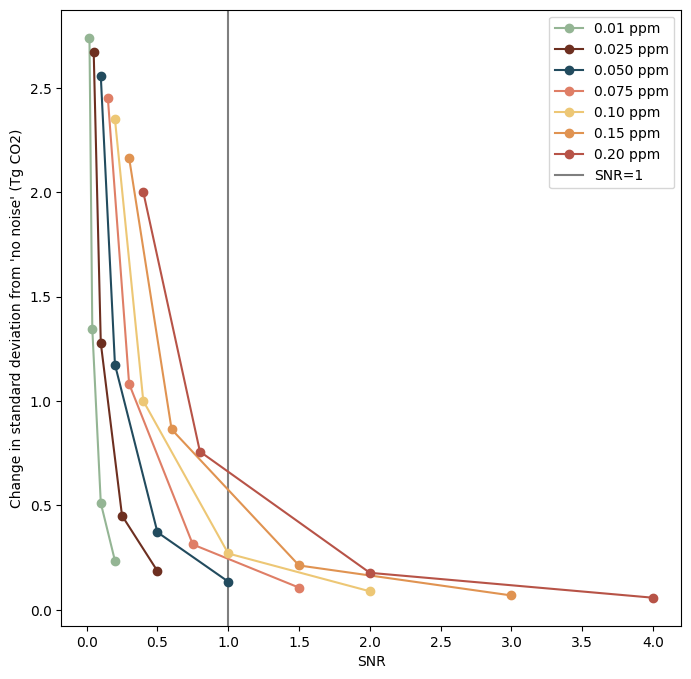

In [43]:
noise_levels = np.array(noise_levels)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(0.01/noise_levels, deviation_from_no_noise_b001, 'o-', color="#94b594", label="0.01 ppm")
ax.plot(0.025/noise_levels, deviation_from_no_noise_b025, 'o-', color="#6d2f20", label="0.025 ppm")
ax.plot(0.05/noise_levels, deviation_from_no_noise_b050, 'o-', color="#224b5e", label="0.050 ppm")
ax.plot(0.075/noise_levels, deviation_from_no_noise_b075, 'o-', color="#df7e66", label="0.075 ppm")
ax.plot(0.10/noise_levels, deviation_from_no_noise_b010, 'o-', color="#edc775", label="0.10 ppm")
ax.plot(0.15/noise_levels, deviation_from_no_noise_b015, 'o-', color="#e09351", label="0.15 ppm")
ax.plot(0.20/noise_levels, deviation_from_no_noise_b020, 'o-', color="#b75347", label="0.20 ppm")
ax.axvline(1, alpha=0.5, zorder=0, color='k', label="SNR=1")
ax.legend()
ax.set_xlabel("SNR")
ax.set_ylabel("Change in standard deviation from 'no noise' (Tg CO2)")


plt.show()

In [41]:
print("0.01 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b001)))
print("0.025 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b025)))
print("0.050 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b050)))
print("0.075 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b075)))
print("0.10 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b010)))
print("0.15 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b015)))
print("0.20 ppm", linregress(np.array(noise_levels), np.array(deviation_from_no_noise_b020)))

0.01 ppm LinregressResult(slope=5.568847049790383, intercept=-0.0447496667761389, rvalue=0.9999995433168342, pvalue=4.5668316583925457e-07, stderr=0.003763335526209144, intercept_stderr=0.0010727156708465499)
0.025 ppm LinregressResult(slope=5.5286045489842595, intercept=-0.09780489423867844, rvalue=0.9999851204808999, pvalue=1.4879519100063916e-05, stderr=0.021326265959138266, intercept_stderr=0.006078921088934437)
0.050 ppm LinregressResult(slope=5.408109876462141, intercept=-0.1574077426528666, rvalue=0.9998430241817273, pvalue=0.0001569758182726755, stderr=0.06776618223696466, intercept_stderr=0.019316333909844212)
0.075 ppm LinregressResult(slope=5.250379617745335, intercept=-0.1934466152928055, rvalue=0.9994941030041682, pvalue=0.0005058969958318116, stderr=0.11813717607632632, intercept_stderr=0.03367427623820927)
0.10 ppm LinregressResult(slope=5.076650600358352, intercept=-0.21520204135035292, rvalue=0.9989635069931461, pvalue=0.0010364930068539335, stderr=0.163567973843051, i

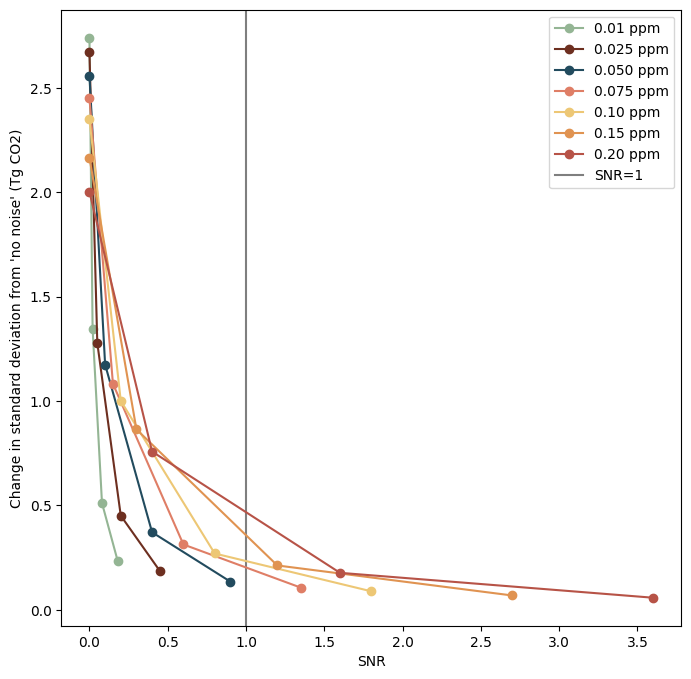

In [49]:

fig, ax = plt.subplots(figsize=(8,8))
ax.plot((0.01/noise_levels)-0.01/0.5, np.array(deviation_from_no_noise_b001), 'o-', color="#94b594", label="0.01 ppm")
ax.plot((0.025/noise_levels)-0.025/0.5, np.array(deviation_from_no_noise_b025), 'o-', color="#6d2f20", label="0.025 ppm")
ax.plot((0.05/noise_levels)-0.05/0.5, np.array(deviation_from_no_noise_b050), 'o-', color="#224b5e", label="0.050 ppm")
ax.plot((0.075/noise_levels)-0.075/0.5, np.array(deviation_from_no_noise_b075), 'o-', color="#df7e66", label="0.075 ppm")
ax.plot((0.10/noise_levels)-0.10/0.5, np.array(deviation_from_no_noise_b010), 'o-', color="#edc775", label="0.10 ppm")
ax.plot((0.15/noise_levels)-0.15/0.5, np.array(deviation_from_no_noise_b015), 'o-', color="#e09351", label="0.15 ppm")
ax.plot((0.20/noise_levels)-0.20/0.5, np.array(deviation_from_no_noise_b020), 'o-', color="#b75347", label="0.20 ppm")

ax.axvline(1, alpha=0.5, zorder=0, color='k', label="SNR=1")
ax.legend()
ax.set_xlabel("SNR")
ax.set_ylabel("Change in standard deviation from 'no noise' (Tg CO2)")


plt.show()